Osnabrück University - Machine Learning (Summer Term 2018) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 05

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 13, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Derivatives in higher dimensions) [2 Bonus Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a partial derivative? What is a directional derivative? How are these computed?

*A partial derivate is the derivative of a multivariable function with respect to one varable while the others are treated as constants. It represents the rate of change if one variable is varied while all others are kept constant.*

*A directional derivative generalized the notion of the partial derivative thus indicating the rate at which the function changes input moves with velocity(direction) of a given vector.  While the partial derivative is taken with respect to some input variable, the directional derivative is taken along some vector.*

**b)** What is the gradient, the Jacobian matrix, and the Hessian matrix? How are they computed?

*The gradient represents the rate of change of a function. It is the derivative of a multivariable function (derivative for each variable) and points in the direction of greatest increase.*

*The Jacobian matrix is a matrix of all first-order partial derivatives of a vector-valued function whereas the Hessian matrix is a matrix of second order partial derivatives of a scalar field/scalar-valued function. The Hessian of a function is the Jacobian of its gradient.*

**c)** What is the chain rule (in calculus)? How does it look in the higher-dimensional case?

*The chain rule is used for computing the derivative of the composition of two or more functions. In higher-dimensions the total derivative is used. The total derivative is a linear transformation that captures how the function changes in all directions.*

## Assignment 1: Curse of Dimensionality [6 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification? 

*The curse of dimensionality refers to different phenomena that occur when analyzing data in high-dimensional spaces. These phenomena normally do not occur in lower dimensional spaces. Two random vectors in high-dimensional space are very likely to be orthogonal to each other and have similar distances. Also, with a growing number of dimensions the amount of possibile combinations exponentially increases.*

*For pattern classification this becomes problematic, as collected data often has a high amount of features and therefore the data will quickly become high dimensional. Clustering becomes very difficult as data vectors will lie far away from each other, but are likely to be close to orthogonal to each other while having similar distances, therefore distance measure cannot be applied and hardly any samples will be close to each other.* 

**b)** Explain how this phenomenom could be used to one's advantage.

*Bertillonage uses this as advantage in order to discriminate humans by using only 11 features as this already creates a big enough feature space*

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.

*Intrinsic dimensionality is the amount of independent parameters necessary to define the data and will most often be much lower than the original dimensionality of the data, which is called the descriptive dimensionality. Taking Bertillonage as an example the descriptive dimensionality of a human would depend on the total of all the features used to describe/measure the person in the data (height, weight, length of ear, etc), whereas the intrinsic dimensionality would only be the 11 features needed to discriminate between the persons measured. Intrinsic dimensionality basically refers to what defines the data and makes it distinguishable. The definition of the data depends on what the data is going to be used for, in the Bertillonage case the question is how a big amount of humans can be discriminated from each other.*

## Assignment 2: Implement and Apply PCA [8 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches). 

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [7]:
import numpy as np

# TODO: Load the cars dataset in cars.csv .
cars = np.loadtxt('cars.csv', delimiter=',')

assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [8]:
import numpy as np

# TODO: Normalize the data and store them in a variable called cars_norm.
cars_norm = (cars - np.mean(cars, axis=0)) /np.std(cars, axis=0)
# Alternatively one could use:
# import sklearn.preprocessing
# cars_norm = sklearn.preprocessing.scale(cars)

assert cars_norm.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)
assert np.abs(np.sum(cars_norm)) < 1e-10, "Absolute sum was {} but should be close to 0".format(np.abs(np.sum(cars_norm)))
assert np.abs(np.sum(cars_norm ** 2) / cars_norm.size - 1) < 1e-10, "The data is not normalized, sum/N was {} not 1".format(np.sum(cars_norm ** 2) / cars_norm.size)

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the autocovariance matrix and afterwards the eigenvalues. When the data is normalized the autocovariance is calculated as
$$C = X^T\cdot X$$
with $X$ being an $m \times n$ matrix with $n$ features and $m$ samples.
The entry $c_{i,j}$ in $C$ tells you how much feature $i$ correlates with feature $j$. 
(Note: sometimes the formula $C=X\cdot X^T$ can be found, i.e., with rows and columns swapped. This depends on whether your put the individual datapoints as rows or columns in you matrix $X$. However, in the end you want to know how the individual features correlate, i.e., in our example you want a $11\times11$-matrix).

In [18]:
import numpy as np

# TODO: Compute the autocovariance matrix and store it into autocovar
autocovar = cars_norm.T @ cars_norm

assert autocovar.shape == (11, 11)

# TODO: Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you) 
eigenval, eigenvec = np.linalg.eig(autocovar) 

assert eigenval.shape == (11,)
assert eigenvec.shape == (11, 11)

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

<IPython.core.display.Javascript object>


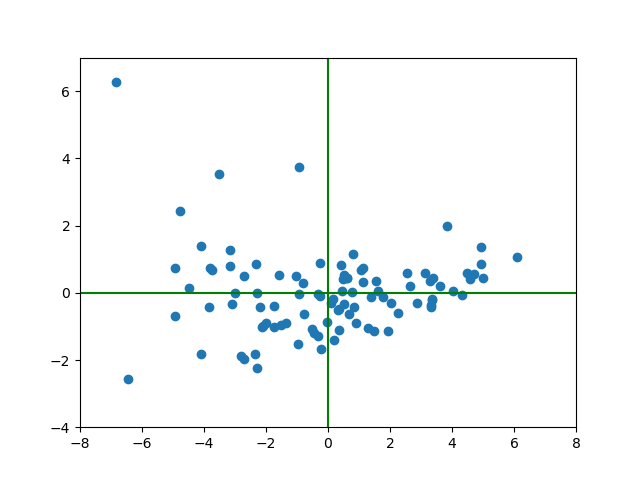

<IPython.core.display.Javascript object>


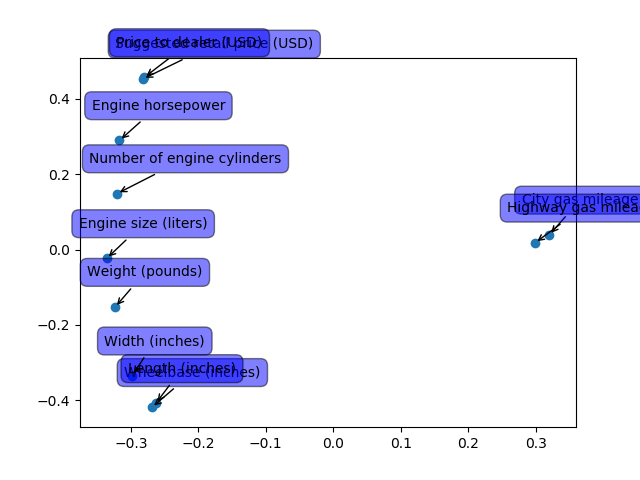

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,0:2]

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca().set_xlim(-8, 8)
fig.gca().set_ylim(-4, 7)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()

Is PCA a good method for this problem? 

*PCA seems to be a good method for the data as the first plot shows the data projected onto the two first principle component vectors and the points are spread out through the subspace relatively well. There are no apparent clusters or too many overlapping points.*

Was it justifiable that we only considered the first two principle components? 

*Considering only the first two principle components seems to make sense when comparing the magnitude of the eigenvectors, however taking into account that only one eigenvector has a high magnitude using 1D might be even better (using eigenvalue magnitude to find cut-off depth). Generally using more dimensions will be very hard to visualize and hard to understand by just looking at it.*

What kinds of cars are in the four quadrants of the first plot?

- *First quadrant (upper-right hand): Cars with high gas mileage*
- *Second quadrant (upper-left hand): Expensive cars with high engine horsepower, lower in weight and size*
- *Third quadrant (lower-left hand): Heavier and bigger cars with less horsepower but cheaper*
- *Fourth quadrant (lower-right hand): Similar to the third quadrant, however with a higher gas mileage*

## Assignment 3: PCA [6 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the autocorrelation matrix $C$ corresponding to the $m$ largest eigenvalues. We proceed in two steps:

### a)

First consider a one dimensional subspace: determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The autocorrelation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

YOUR ANSWER HERE

### b)

Now proof the statement for the general case of an $m$-dimensional projection space.

Use an inductive argument: assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to case (a), but with additional Lagrangian multipliers to enforce the orthogonality constraint. Show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally show that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.

YOUR ANSWER HERE